In [1]:
import os
import cv2
import pickle
from tqdm import tqdm
import numpy as np

# 폴더 경로
base_dir = "/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4"
stages = ['train_data', 'validation_data', 'test_data']
folders = ['Lt_Normal', 'Lt_OA', 'Rt_Normal', 'Rt_OA']
label_mapping = {
    'Lt_Normal': 0,
    'Lt_OA': 1,
    'Rt_Normal': 0,
    'Rt_OA': 1
}

# 데이터를 저장할 딕셔너리
data = {}

for stage in stages:
    print(f"Processing {stage}...")
    data[stage] = {'image': [], 'patient_id': [], 'side': [], 'label': []}

    stage_path = os.path.join(base_dir, stage)
    for folder in folders:
        folder_path = os.path.join(stage_path, folder)
        label = label_mapping[folder]  # 폴더 이름으로 Label 결정

        for image_file in tqdm(os.listdir(folder_path)):
            if not image_file.lower().endswith('.jpg'):
                continue  # 이미지 파일이 아니면 스킵

            try:
                # 파일 이름에서 Patient ID 추출
                name, ext = os.path.splitext(image_file) # CBCT Code
                parts = name.split(' ')
                patient_id = parts[0]

                #patient_id, side = image_file.split('') # MRI CODE
                side = 'Lt' if 'Lt' in folder else 'Rt'  # 폴더 이름에서 좌우 구분
                image_path = os.path.join(folder_path, image_file)

                # 이미지 읽고 리사이즈
                image = cv2.imread(image_path)
                resized_image = cv2.resize(image, (140, 140))  # 리사이즈 크기 설정
                data[stage]['image'].append(resized_image)
                data[stage]['patient_id'].append(patient_id)
                data[stage]['side'].append(side)
                data[stage]['label'].append(label)

            except Exception as e:
                print(f"Error processing file: {image_file}, Error: {e}")

    # numpy 배열로 변환
    data[stage]['image'] = np.array(data[stage]['image'])
    data[stage]['label'] = np.array(data[stage]['label'])

# 데이터 저장
pkl_file_path = os.path.join(base_dir, "/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/tmj_oa_CBCT2,4 + NEW_dataset.pkl")
with open(pkl_file_path, 'wb') as f:
    pickle.dump(data, f)

print(f"Data successfully saved to {pkl_file_path}")

Processing train_data...


100%|██████████| 321/321 [00:07<00:00, 45.09it/s] 


Processing validation_data...


100%|██████████| 97/97 [01:00<00:00,  1.60it/s]


Processing test_data...


100%|██████████| 111/111 [00:03<00:00, 29.75it/s]


Data successfully saved to /content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/tmj_oa_CBCT2,4 + NEW_dataset.pkl


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step
Class weights: {0: 0.8519668737060041, 1: 1.2102941176470587}
Epoch 1/30


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


52/52 ━━━━━━━━━━━━━━━━━━━━ 64s 720ms/step - accuracy: 0.5574 - auc: 0.5615 - loss: 0.8150 - val_accuracy: 0.4109 - val_auc: 0.5853 - val_loss: 1.0423 - learning_rate: 1.0000e-04
Epoch 2/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 38s 278ms/step - accuracy: 0.5812 - auc: 0.6183 - loss: 0.7064 - val_accuracy: 0.5891 - val_auc: 0.5000 - val_loss: 3.4726 - learning_rate: 1.0000e-04
Epoch 3/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 20s 275ms/step - accuracy: 0.6275 - auc: 0.6874 - loss: 0.6608 - val_accuracy: 0.5891 - val_auc: 0.5000 - val_loss: 4.4885 - learning_rate: 1.0000e-04
Epoch 4/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 295ms/step - accuracy: 0.6037 - auc: 0.6560 - loss: 0.6687 - val_accuracy: 0.5891 - val_auc: 0.6361 - val_loss: 2.3193 - learning_rate: 1.0000e-04
Epoch 5/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 16s 288ms/step - accuracy: 0.6281 - auc: 0.6751 - loss: 0.6671 - val_accuracy: 0.4109 - val_auc: 0.5300 - val_loss: 3.6341 - learning_rate: 1.0000e-04
Epoch 6/30
52/52 ━━━━━━━━━━━━━━━━━━━━ 21s 302ms/step - accuracy: 0

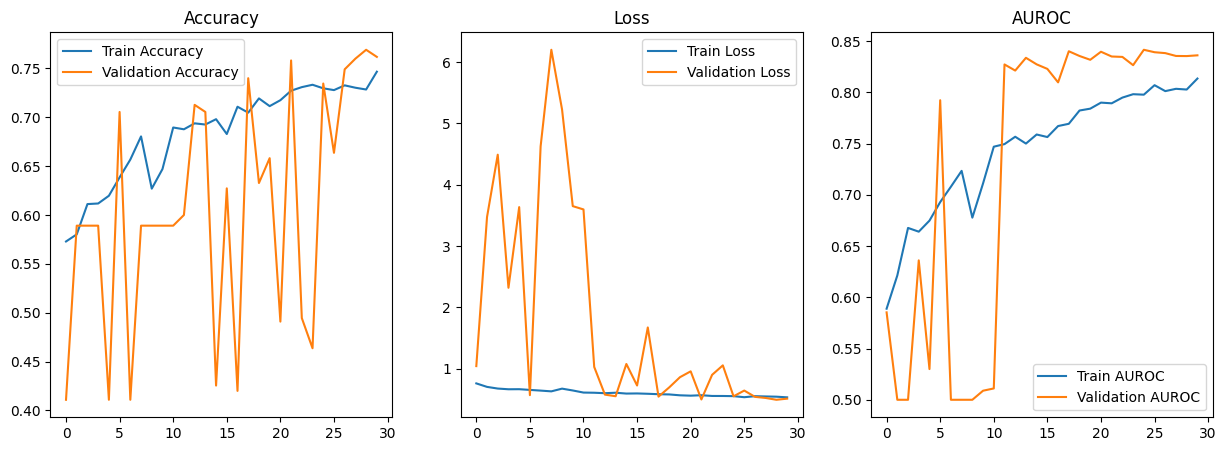

18/18 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.6909 - auc: 0.6088 - loss: 0.6344
Test Loss: 0.6128, Test Accuracy: 0.6824, Test AUROC: 0.7876
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
Optimal Threshold: 0.6927


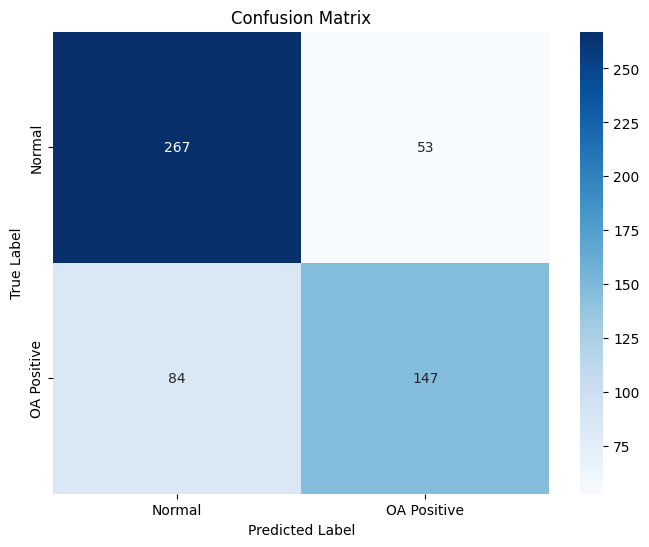

Confusion Matrix:
 [[267  53]
 [ 84 147]]
Classification Report:
               precision    recall  f1-score   support

           0       0.76      0.83      0.80       320
           1       0.73      0.64      0.68       231

    accuracy                           0.75       551
   macro avg       0.75      0.74      0.74       551
weighted avg       0.75      0.75      0.75       551



In [1]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.utils.class_weight import compute_class_weight
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 피클 파일 로드
with open('/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/tmj_oa_CBCT2,4 + NEW_dataset.pkl', 'rb') as f:
    dataset = pickle.load(f)

# 데이터셋 분리
train_images = dataset['train_data']['image']
train_labels = dataset['train_data']['label']
val_images = dataset['validation_data']['image']
val_labels = dataset['validation_data']['label']
test_images = dataset['test_data']['image']
test_labels = dataset['test_data']['label']

# 데이터 증강 생성기 설정
train_datagen = ImageDataGenerator(
    rescale=1.0 / 255,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2],
    fill_mode='reflect'
)

val_datagen = ImageDataGenerator(rescale=1.0 / 255)
test_datagen = ImageDataGenerator(rescale=1.0 / 255)

# 데이터 증강 생성기를 통해 데이터 생성
train_generator = train_datagen.flow(
    train_images, train_labels, batch_size=32, shuffle=True
)

val_generator = val_datagen.flow(
    val_images, val_labels, batch_size=32, shuffle=False
)

test_generator = test_datagen.flow(
    test_images, test_labels, batch_size=32, shuffle=False
)

# VGG16 모델 구성
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(140, 140, 3))
for layer in base_model.layers[:-12]:
    layer.trainable = True

model = Sequential([
    base_model,
    Flatten(),
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# 모델 컴파일
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy', tf.keras.metrics.AUC(name='auc')])

# 클래스 가중치 계산
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_labels),
    y=train_labels
)
class_weights = dict(enumerate(class_weights))
print("Class weights:", class_weights)

# 콜백 설정
early_stopping = EarlyStopping(monitor='val_auc', patience=7, mode='max', restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model_vgg16_auroc.keras', save_best_only=True, monitor='val_auc', mode='max')
reduce_lr = ReduceLROnPlateau(monitor='val_auc', factor=0.5, patience=3, mode='max', min_lr=1e-6)

# 모델 학습
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=30,
    class_weight=class_weights,
    callbacks=[early_stopping, model_checkpoint, reduce_lr]
)

# 학습 결과 시각화
plt.figure(figsize=(15, 5))
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')

plt.subplot(1, 3, 3)
plt.plot(history.history['auc'], label='Train AUROC')
plt.plot(history.history['val_auc'], label='Validation AUROC')
plt.legend()
plt.title('AUROC')
plt.show()

# 테스트 데이터 평가
test_loss, test_accuracy, test_auc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}, Test AUROC: {test_auc:.4f}")

# ROC Curve
y_pred = model.predict(test_generator).flatten()
fpr, tpr, thresholds = roc_curve(test_labels, y_pred)
optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# Confusion Matrix
y_pred_adjusted = (y_pred >= optimal_threshold).astype(int)
#y_pred_adjusted = (y_pred >= 0.4).astype(int)  # 임계값을 약간 높임
conf_matrix = confusion_matrix(test_labels, y_pred_adjusted)

# Confusion Matrix 시각화
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=["Normal", "OA Positive"], yticklabels=["Normal", "OA Positive"])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", classification_report(test_labels, y_pred_adjusted))

model.save('/content/drive/MyDrive/TMJ OA/기존 CBCT 2,4 + NEW CBCT 3,4/CBCT2,4+NEW_model.keras')


18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 92ms/step
AUC: 0.7877
95% CI: 0.7476 - 0.8253


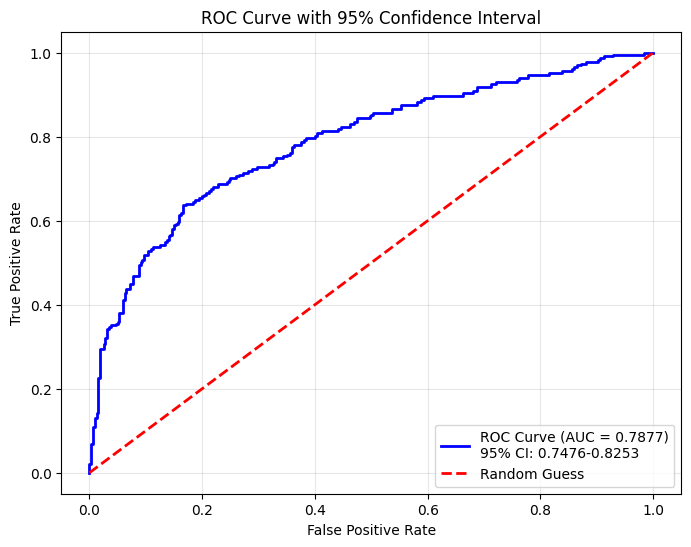

In [2]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np

# 테스트 레이블 및 예측값
y_true = test_labels  # 실제 레이블
y_pred = model.predict(test_images / 255.0).flatten()  # 예측 확률값 (스케일링된 이미지 사용)

# ROC Curve 계산
fpr, tpr, thresholds = roc_curve(y_true, y_pred)
roc_auc = roc_auc_score(y_true, y_pred)

# AUC 95% CI 계산 (부트스트랩)
n_bootstraps = 1000  # 부트스트랩 샘플 수
rng = np.random.RandomState(42)  # 재현성 확보
bootstrapped_aucs = []

for i in range(n_bootstraps):
    # 부트스트랩 샘플링
    indices = rng.choice(len(y_true), len(y_true), replace=True)
    y_true_bootstrap = y_true[indices]
    y_pred_bootstrap = y_pred[indices]

    try:
        auc_bootstrap = roc_auc_score(y_true_bootstrap, y_pred_bootstrap)
        bootstrapped_aucs.append(auc_bootstrap)
    except ValueError:  # 예외 처리 (불가능한 경우 스킵)
        continue

# 신뢰 구간 계산
lower = np.percentile(bootstrapped_aucs, 2.5)
upper = np.percentile(bootstrapped_aucs, 97.5)

print(f"AUC: {roc_auc:.4f}")
print(f"95% CI: {lower:.4f} - {upper:.4f}")

# ROC Curve 시각화
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})\n95% CI: {lower:.4f}-{upper:.4f}')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', lw=2, label='Random Guess')

# 그래프 스타일 설정
plt.title('ROC Curve with 95% Confidence Interval')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()
